<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

In [12]:
# A:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [13]:
# A:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
boston = pd.concat([y, x], axis=1)

In [15]:
boston.head(20)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [17]:
# A:
x = boston[['RM','AGE','CRIM','DIS']]
y = boston.MEDV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .5, random_state = 1)
x_train.head(10)

,RM,AGE,CRIM,DIS
432,6.425,74.8,6.44405,2.2004
403,5.349,96.0,24.80170,1.7028
349,6.939,34.5,0.02899,8.7921
433,6.436,87.9,5.58107,2.3158
410,5.757,100.0,51.13580,1.4130
305,6.616,58.1,0.05479,3.3700
284,7.088,20.8,0.00906,7.3073
331,5.706,28.4,0.05023,6.6407
175,6.546,33.1,0.06664,3.1323
417,5.304,89.1,25.94060,1.6475


37.36512406509902


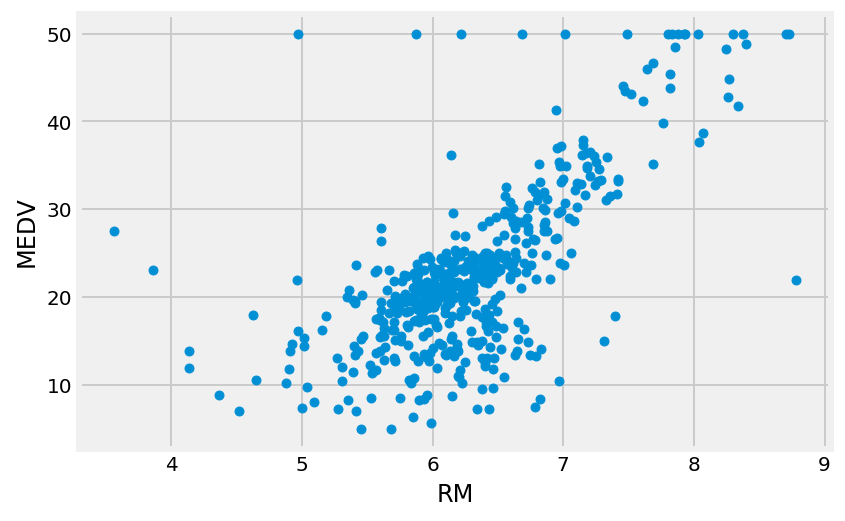

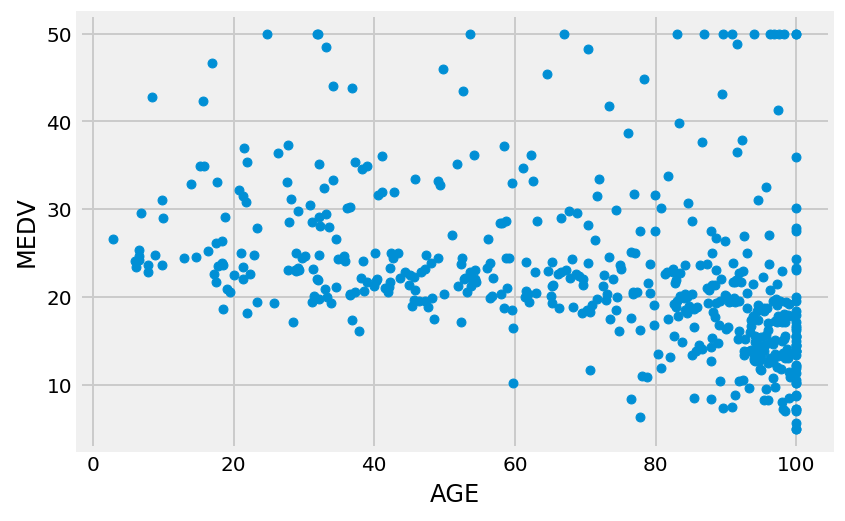

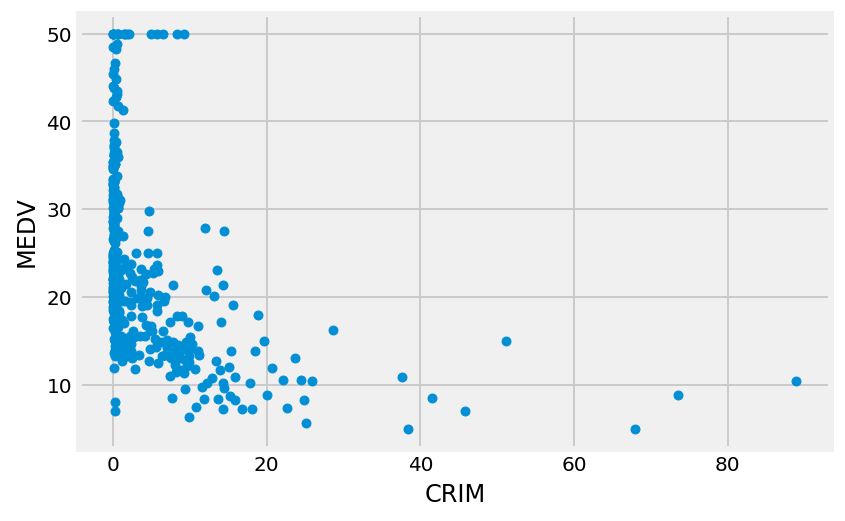

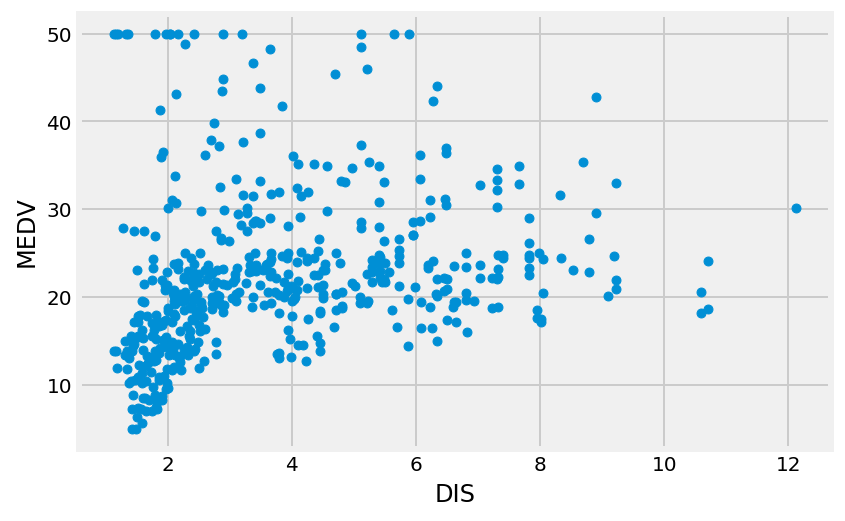

In [29]:
from sklearn import metrics

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

plot1 = boston.plot.scatter(x = 'RM', y ='MEDV')
plot2 = boston.plot.scatter(x = 'AGE', y ='MEDV')
plot3 = boston.plot.scatter(x = 'CRIM', y ='MEDV')
plot4 = boston.plot.scatter(x = 'DIS', y ='MEDV')

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [34]:
# A:
def score_plot(size):
    x = boston[['RM','AGE','CRIM','DIS']]
    y = boston.MEDV

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = size, random_state = 1)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    y_pred = lr.predict(x_test)
    print(metrics.mean_squared_error(y_test, y_pred))
    
score_plot(.3)
score_plot(.1)

31.168641660456903
35.14654603313634


### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [47]:
# A:
from sklearn.model_selection import KFold

mse_values = []
scores = []
for K in range(5,10):
    n = 0
    print("-------------------------------")
    kf = KFold(K, shuffle = True)
    for train_indices, test_indices in kf.split(x, y):
        lr = LinearRegression().fit(
            x.iloc[train_indices], y.iloc[train_indices]
        )

        mse_values.append(
            metrics.mean_squared_error(
                y.iloc[test_indices], lr.predict(x.iloc[test_indices])
            )
        )
        scores.append(lr.score(x, y))

        print('Model: {}'.format(n+1))
        print('MSE: {}'.format(mse_values[n]))
        print('R2: {}\n'.format(scores[n]))
        
        n += 1
        
    print('MSE Mean: {}'.format(np.mean(mse_values)))
    print('R2 Mean: {}'.format(np.mean(scores)))

-------------------------------
Model: 1
MSE: 28.69651073684057
R2: 0.5752118496264804

Model: 2
MSE: 17.758801644276165
R2: 0.5738881994997826

Model: 3
MSE: 37.57099262196564
R2: 0.5750350754665187

Model: 4
MSE: 58.11433429435849
R2: 0.5734361832176806

Model: 5
MSE: 40.33102168784459
R2: 0.57494163868106

MSE Mean: 36.49433219705709
R2 Mean: 0.5745025892983044
-------------------------------
Model: 1
MSE: 28.69651073684057
R2: 0.5752118496264804

Model: 2
MSE: 17.758801644276165
R2: 0.5738881994997826

Model: 3
MSE: 37.57099262196564
R2: 0.5750350754665187

Model: 4
MSE: 58.11433429435849
R2: 0.5734361832176806

Model: 5
MSE: 40.33102168784459
R2: 0.57494163868106

Model: 6
MSE: 39.44781772430617
R2: 0.5740385676636506

MSE Mean: 36.64309913657633
R2 Mean: 0.5743991390997373
-------------------------------
Model: 1
MSE: 28.69651073684057
R2: 0.5752118496264804

Model: 2
MSE: 17.758801644276165
R2: 0.5738881994997826

Model: 3
MSE: 37.57099262196564
R2: 0.5750350754665187

Model: 4


In [ ]:
# The MSE and R2 Mean slightly increase

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [8]:
# A:

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [10]:
import patsy

# A: